In [2]:
import pandas as pd
import requests, json, csv
from matplotlib import pyplot as plt


In [5]:
def get_dst(table, param) :
#   url til api; forudsætter altid CSV
    url = "https://api.statbank.dk/v1/data/{}/CSV".format(table)
    r = requests.get(url, params=param)
    r_decode = r.content.decode()
    csvlist = csv.reader(r_decode.splitlines(), delimiter=';')

    df = pd.DataFrame(list(csvlist))
    print(df.head())
    heads = df.iloc[0,:]
    df = df[1:].copy()
    df.columns = heads
    df['INDHOLD'] = df['INDHOLD'].apply(lambda x: int(x))
    
    return df



In [8]:

table = 'skib72'

parametre = {'valuePresentation': 'Value',
             'havn': ['00000', '00465', '00175', '00105', '00102', '00790'],
             'ret': ['1184'], 
             'gods': ['100'],
             'tid': ['2007K1', '2007K2', '2007K3', '2007K14',
                     '2008K1', '2008K2', '2008K3', '2008K14',
                     '2009K1', '2009K2', '2009K3', '2009K14',
                     '2010K1', '2010K2', '2010K3', '2010K14',
                     '2011K1', '2011K2', '2011K3', '2011K14',
                     '2012K1', '2012K2', '2012K3', '2012K14',
                     '2013K1', '2013K2', '2013K3', '2013K14',
                     '2014K1', '2014K2', '2014K3', '2014K14',
                     '2015K1', '2015K2', '2015K3', '2015K14',
                     '2016K1', '2016K2', '2016K3', '2016K14',
                     '2017K1', '2017K2', '2017K3', '2017K14']}

df = get_dst(table, parametre)


                                                   0
0  {"errorTypeCode":"EXTRACT-NOTFOUND","message":...


KeyError: 'INDHOLD'

0           ﻿HAVN              ENHED  INDHOLD
TID                                          
2007  Skagen Havn  Skibsanløb, antal      474
2008  Skagen Havn  Skibsanløb, antal      452
2009  Skagen Havn  Skibsanløb, antal      416
2010  Skagen Havn  Skibsanløb, antal      459
2011  Skagen Havn  Skibsanløb, antal      472


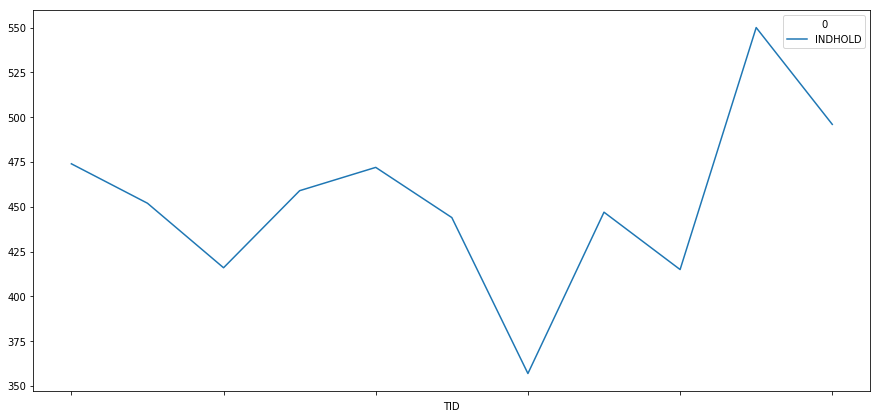

In [64]:
# df.set_index('TID', drop=True, inplace=True)
print(df.head())
f, a = plt.subplots(figsize=(15,7))

df[df.ENHED=='Skibsanløb, antal'].plot(ax=a)